# Libraries

In [476]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [477]:
df = pd.read_csv('day.csv', index_col=0)

In [478]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [479]:
df

,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [480]:
df.isnull().sum()

dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   year        730 non-null    int64  
 3   month       730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weather     730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  count       730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [482]:
df.columns

Index(['dteday', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [483]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [484]:
df['season'] = df['season'].replace(1, 'spring')
df['season'] = df['season'].replace(2, 'summer')
df['season'] = df['season'].replace(3, 'fall')
df['season'] = df['season'].replace(4, 'winter')
#df['season'] = df.loc[(df['season']==1), 'season']='spring'

In [485]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [486]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [487]:
def object_map(x):
    return x.map({1:'jan',
                  2:'feb',
                  3:'mar',
                  4:'apr',
                  5:'may',
                  6:'june',
                  7:'july',
                  8:'aug',
                  9:'sep',
                  10:'oct',
                  11:'nov',
                  12:'dec'})

In [488]:
df['month']= df[['month']].apply(object_map)

In [489]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [490]:
df['month'].value_counts()

jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: month, dtype: int64

In [491]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [492]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [493]:
def week_map(x):
    return x.map({1:'wed',
                  2:'thur',
                  3:'fri',
                  4:'sat',
                  5:'sun',
                  6:'mon',
                  0:'tues'})

In [494]:
df['weekday'] = df[['weekday']].apply(week_map)

In [495]:
df['weekday'].unique()

array(['mon', 'tues', 'wed', 'thur', 'fri', 'sat', 'sun'], dtype=object)

In [496]:
df['weekday'].value_counts()

mon     105
tues    105
wed     105
thur    104
sat     104
sun     104
fri     103
Name: weekday, dtype: int64

In [497]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [498]:
df['weather']

instant
1      2
2      2
3      1
4      1
5      1
      ..
726    2
727    2
728    2
729    1
730    2
Name: weather, Length: 730, dtype: int64

In [499]:
df['weather'].value_counts()

1    463
2    246
3     21
Name: weather, dtype: int64

In [500]:
def weather_map(x):
    return x.map({1:'Clear',
                  2:'Bad',
                  3:'Rainy'})

In [501]:
df['weather'] = df[['weather']].apply(weather_map)

In [502]:
df['weather'].unique()

array(['Bad', 'Clear', 'Rainy'], dtype=object)

In [503]:
df['weather'].value_counts()

Clear    463
Bad      246
Rainy     21
Name: weather, dtype: int64

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   year        730 non-null    int64  
 3   month       730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weather     730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  count       730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [505]:
df['temp']

instant
1      14.110847
2      14.902598
3       8.050924
4       8.200000
5       9.305237
         ...    
726    10.420847
727    10.386653
728    10.386653
729    10.489153
730     8.849153
Name: temp, Length: 730, dtype: float64

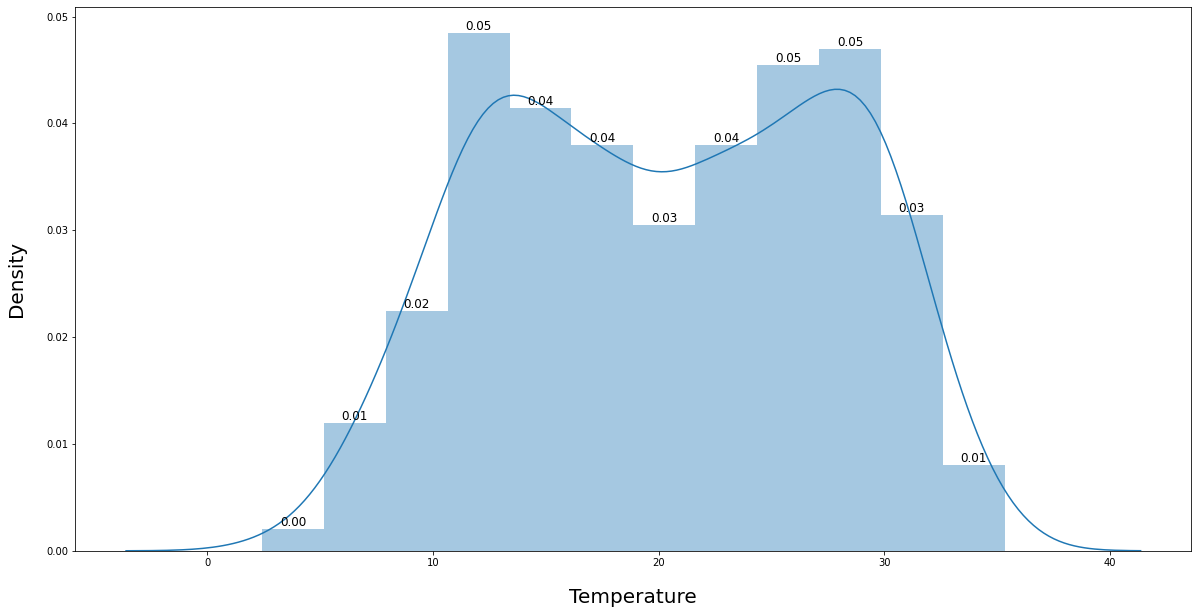

In [506]:
plt.figure(figsize=(20, 10))

_=sns.distplot(df['temp'])
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Density', fontsize=20, labelpad=20)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%.2f' %float(i.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

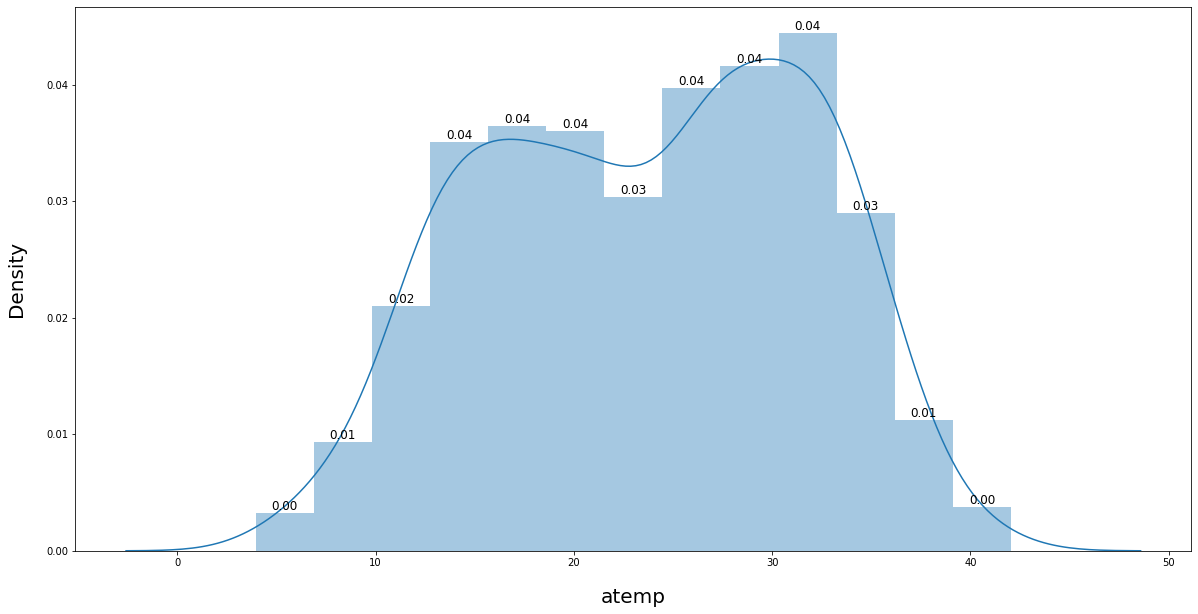

In [507]:
plt.figure(figsize=(20, 10))

_=sns.distplot(df['atemp'])
plt.xlabel('atemp', fontsize=20, labelpad=20)
plt.ylabel('Density', fontsize=20, labelpad=20)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%.2f' %float(i.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

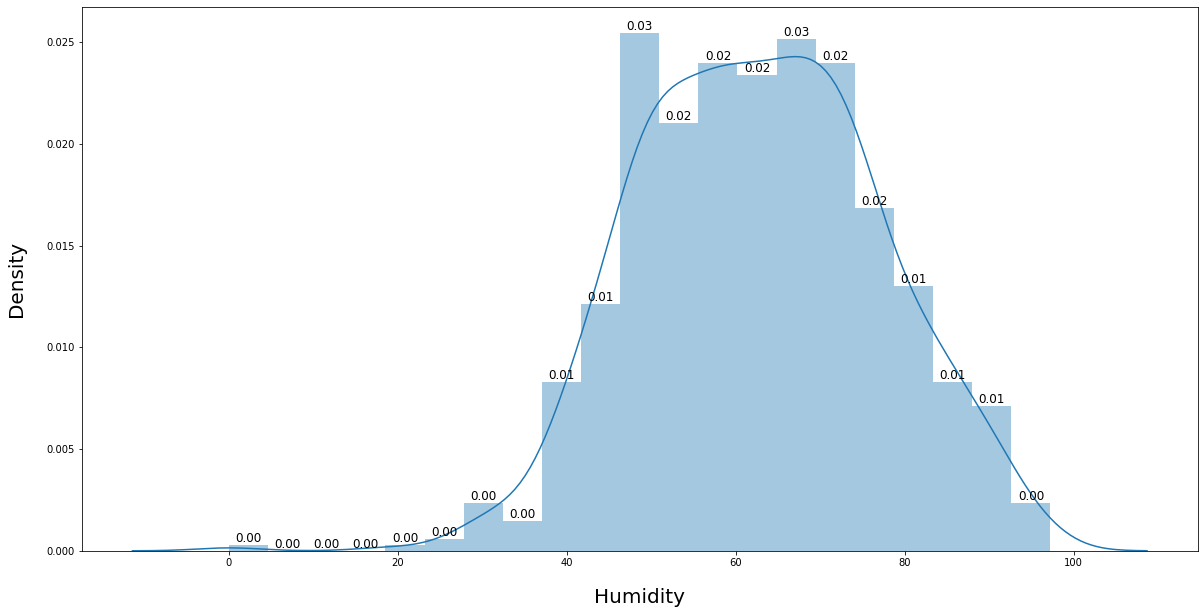

In [508]:
plt.figure(figsize=(20, 10))

_=sns.distplot(df['humidity'])
plt.xlabel('Humidity', fontsize=20, labelpad=20)
plt.ylabel('Density', fontsize=20, labelpad=20)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%.2f' %float(i.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

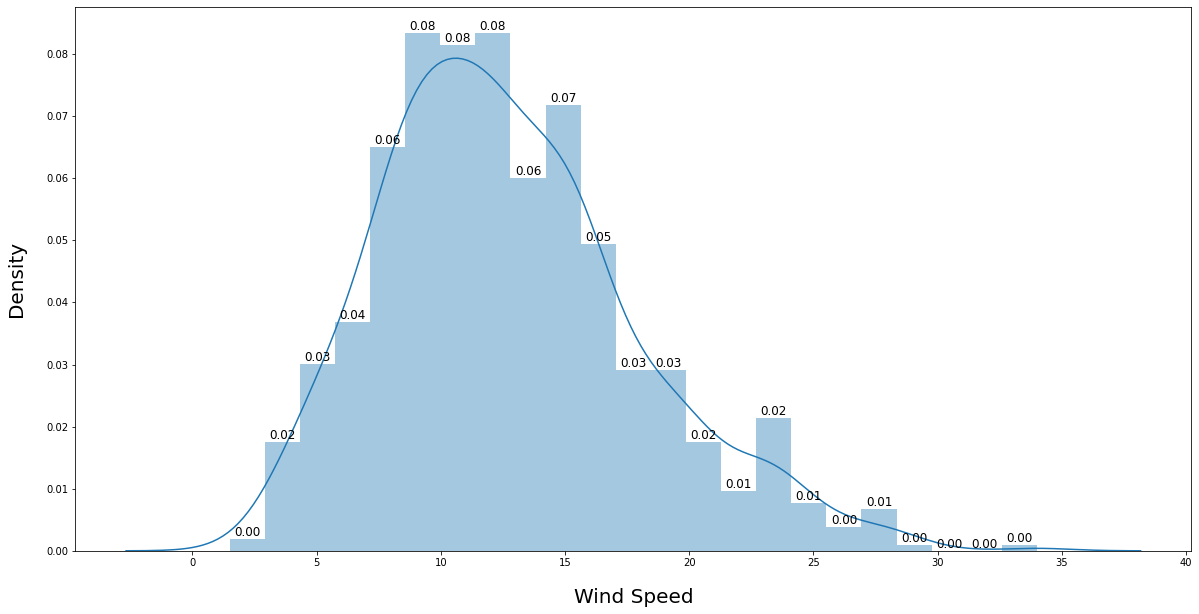

In [509]:
plt.figure(figsize=(20, 10))

_=sns.distplot(df['windspeed'])
plt.xlabel('Wind Speed', fontsize=20, labelpad=20)
plt.ylabel('Density', fontsize=20, labelpad=20)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%.2f' %float(i.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

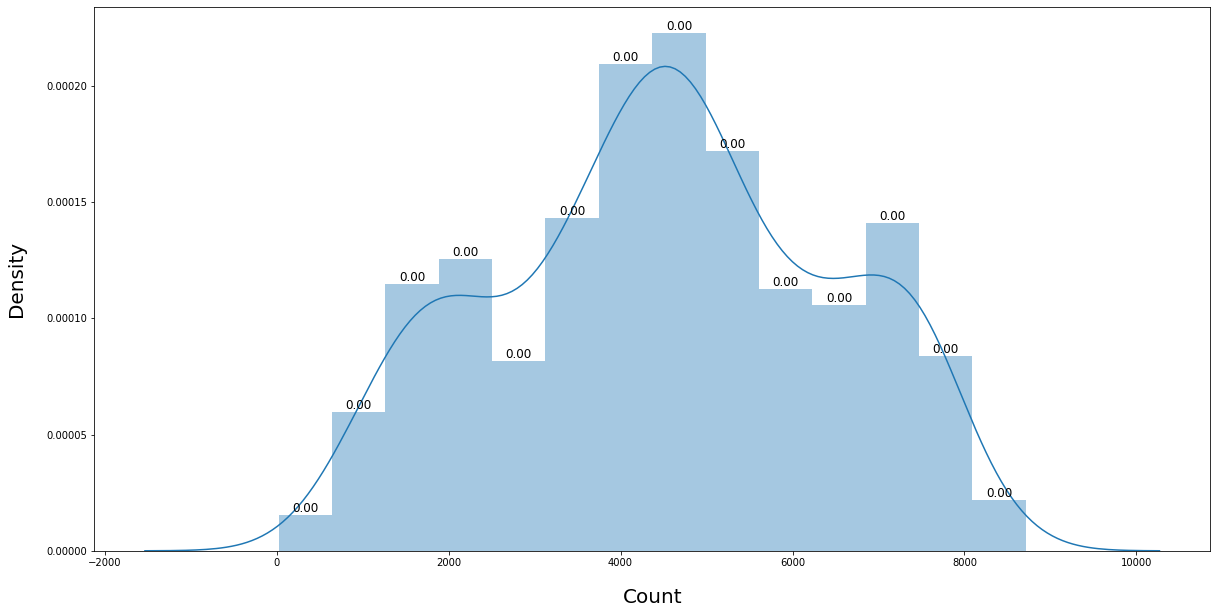

In [510]:
plt.figure(figsize=(20, 10))

_=sns.distplot(df['count'])
plt.xlabel('Count', fontsize=20, labelpad=20)
plt.ylabel('Density', fontsize=20, labelpad=20)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%.2f' %float(i.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

In [511]:
df['dteday'] = pd.to_datetime(df['dteday'])
#df['dteday']= df['dteday'].astype(df['dteday'])

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weather     730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  humidity    730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  count       730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [513]:
df_categorical = df.select_dtypes('object')

In [514]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   730 non-null    object
 1   month    730 non-null    object
 2   weekday  730 non-null    object
 3   weather  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [515]:
df_categorical

,season,month,weekday,weather
instant,,,,
1,spring,jan,mon,Bad
2,spring,jan,tues,Bad
3,spring,jan,wed,Clear
4,spring,jan,thur,Clear
5,spring,jan,fri,Clear
...,...,...,...,...
726,spring,dec,sat,Bad
727,spring,dec,sun,Bad
728,spring,dec,mon,Bad


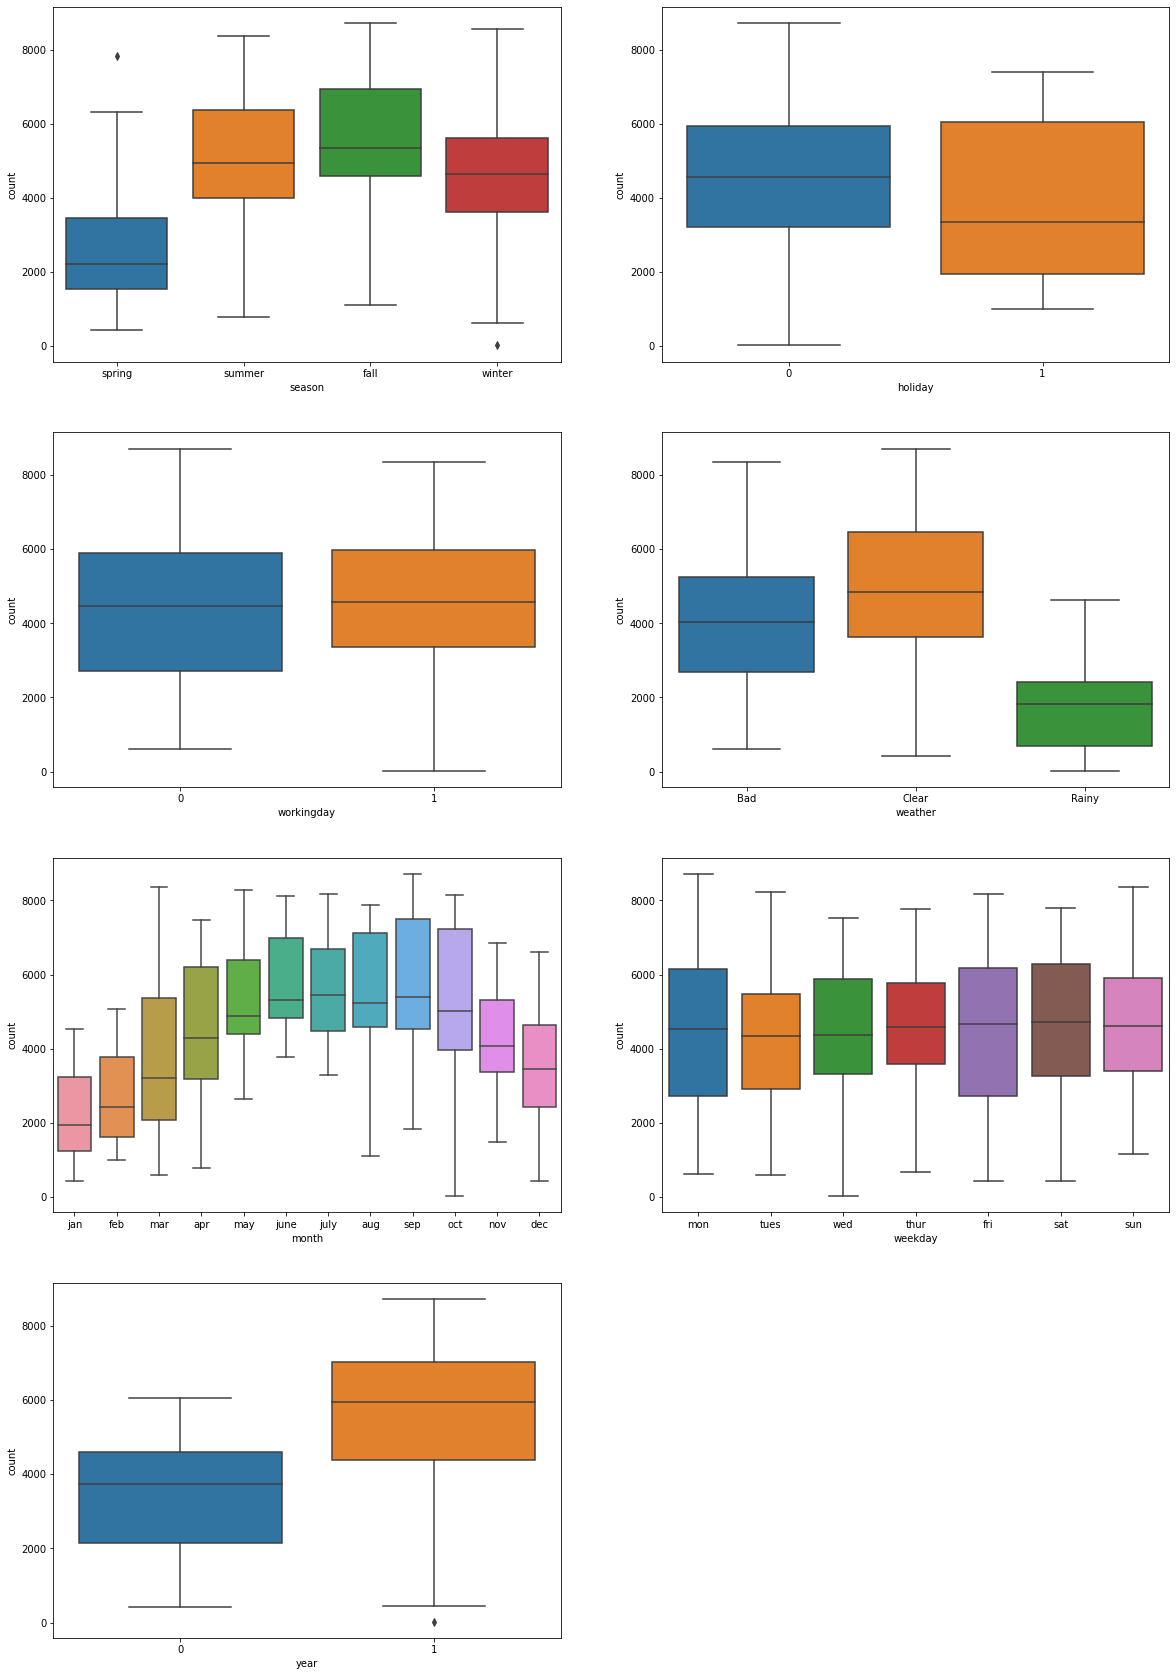

In [516]:
plt.figure(figsize=(20, 30))

plt.subplot(4,2,1)
sns.boxplot(x=df['season'], y=df['count'], data=df)

plt.subplot(4,2,2)
sns.boxplot(x=df['holiday'], y=df['count'], data=df)

plt.subplot(4,2,3)
sns.boxplot(x=df['workingday'], y=df['count'], data=df)

plt.subplot(4,2,4)
sns.boxplot(x=df['weather'], y=df['count'], data=df)

plt.subplot(4,2,5)
sns.boxplot(x=df['month'], y=df['count'], data=df)

plt.subplot(4,2,6)
sns.boxplot(x=df['weekday'], y=df['count'], data=df)

plt.subplot(4,2,7)
sns.boxplot(x=df['year'], y=df['count'], data=df)

plt.show()

In [517]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric

,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,1,0,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,1,0,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [518]:
df_numeric = df_numeric.drop(['year', 'holiday', 'workingday', 'atemp'], axis=1)

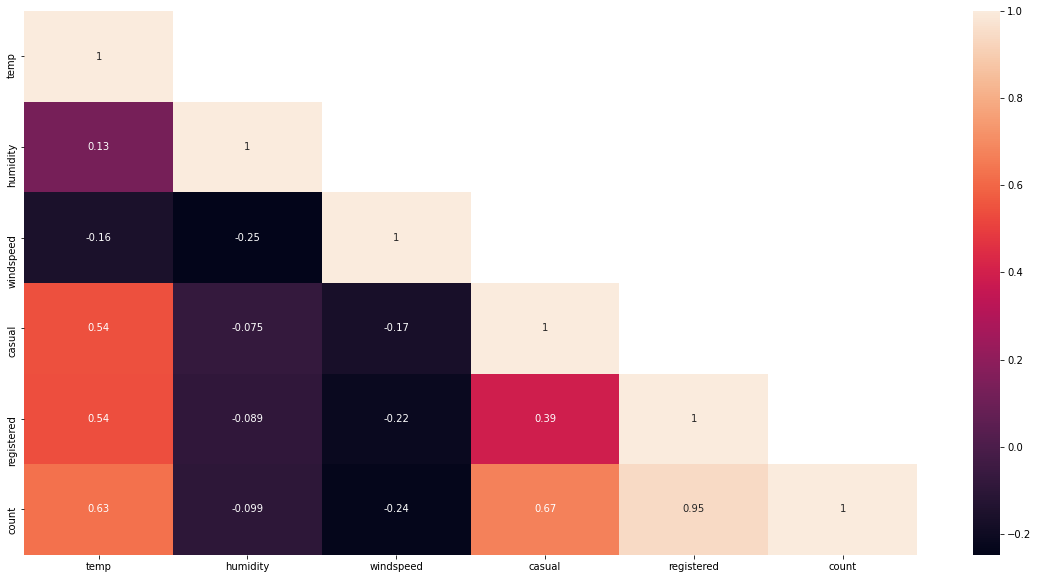

In [519]:
plt.figure(figsize=(20, 10))
mask=np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(), annot=True, mask=mask)
plt.show()

In [520]:
df_categorical

,season,month,weekday,weather
instant,,,,
1,spring,jan,mon,Bad
2,spring,jan,tues,Bad
3,spring,jan,wed,Clear
4,spring,jan,thur,Clear
5,spring,jan,fri,Clear
...,...,...,...,...
726,spring,dec,sat,Bad
727,spring,dec,sun,Bad
728,spring,dec,mon,Bad


In [521]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weather_Clear,weather_Rainy
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [522]:
df = df.drop(list(df_categorical.columns), axis=1)
df

,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,1,0,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,2019-12-28,1,0,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,2019-12-29,1,0,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [523]:
df = pd.concat([df, df_dummies], axis=1)
df.head()

,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weather_Clear,weather_Rainy
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,1,0
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,1,0
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   year           730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   atemp          730 non-null    float64       
 6   humidity       730 non-null    float64       
 7   windspeed      730 non-null    float64       
 8   casual         730 non-null    int64         
 9   registered     730 non-null    int64         
 10  count          730 non-null    int64         
 11  season_spring  730 non-null    uint8         
 12  season_summer  730 non-null    uint8         
 13  season_winter  730 non-null    uint8         
 14  month_aug      730 non-null    uint8         
 15  month_dec      730 non-

In [525]:
df.drop(['dteday'], axis=1, inplace=True)
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weather_Clear,weather_Rainy
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,1,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,1,0


# Train & Test

In [526]:
y  = df['count']
df = df.drop(['count'], axis=1)
X  = df

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# Normalization

In [528]:
sc = MinMaxScaler()

X_train[['atemp', 'humidity', 'windspeed', 'casual', 'registered']] = sc.fit_transform(X_train[['atemp', 'humidity', 'windspeed', 'casual', 'registered']])
X_test[['atemp', 'humidity', 'windspeed', 'casual', 'registered']]  = sc.transform(X_test[['atemp', 'humidity', 'windspeed', 'casual', 'registered']])

# Model (GradientBoostingRegressor)

In [529]:
model = GradientBoostingRegressor()

In [530]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [531]:
model.score(X_train, y_train)

0.999049329839438

In [532]:
model.score(X_test, y_test)

0.9954623762256934